### PRICE REGRESSION MODELLING

Librerías

In [10]:
import numpy as np
from sklearn.decomposition import PCA
from urllib.parse import urlencode
import pandas as pd
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import math
from plotly.subplots import make_subplots


pio.renderers.default = 'vscode'
pio.templates.default = 'plotly'

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize


import plotly.figure_factory as ff

import geopandas 
import json

from cv2 import mean
from itertools import count

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from scipy.stats import uniform, randint

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

Importación de datos

In [3]:
listings_total_data = pd.read_parquet("../Data/total data/raw data parquet/listings.parquet")
pd.options.display.max_columns = None
listings_total_data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20220907064715,2022-09-07,city scrape,Clean & quiet apt home by the park,Renovated apt home in elevator building.<br />...,Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/3949d073-a02e...,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, NY",Educated professional living in Brooklyn. I l...,within an hour,100%,90%,f,https://a0.muscache.com/im/pictures/user/86745...,https://a0.muscache.com/im/pictures/user/86745...,Gravesend,9.0,12.0,"['email', 'phone']",t,t,"Brooklyn , New York, United States",Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""First aid kit"", ""Microwave"", ""Stove"", ""Coffe...",$299.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,21,51,81,356,2022-09-07,9,0,0,2015-12-04,2018-10-19,4.89,4.88,5.00,5.00,5.00,4.75,4.88,None,f,9,1,6,2,0.11
1,2595,https://www.airbnb.com/rooms/2595,20220907064715,2022-09-07,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, NY",A New Yorker since (Phone number hidden by Air...,within a day,75%,23%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,9.0,"['email', 'phone', 'work_email']",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Stove"", ""Coffee maker"", ""Long term stays all...",$175.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,5,280,2022-09-07,49,1,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.80,4.81,4.40,None,f,3,3,0,0,0.31
2,5121,https://www.airbnb.com/rooms/5121,20220907064715,2022-09-07,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,None,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, NY","I am an artist(painter, filmmaker) and curato...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,2.0,2.0,"['email', 'phone']",t,t,None,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,None,1.0,1.0,"[""Heating"", ""Kitchen"", ""Air conditioning"", ""Wi...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,5,30,60,335,2022-09-07,50,0,0,2009-05-28,2019-12-02,4.52,4.22,4.09,4.91,4.91,4.47,4.52,None,f,2,0,2,0,0.31
3,45910,https://ww

In [4]:
#selección de las columnas que nos interesan
columnList = ["id","last_scraped","host_name","host_since","host_response_time","host_id","host_response_rate","host_acceptance_rate",
              "host_is_superhost","host_neighbourhood","host_listings_count","host_total_listings_count","host_has_profile_pic",
              "host_identity_verified","neighbourhood_cleansed","neighbourhood_group_cleansed","latitude","longitude","property_type",
              "room_type","accommodates","bathrooms","bathrooms_text","bedrooms","beds","amenities","price","minimum_nights","maximum_nights",
              "minimum_minimum_nights","maximum_minimum_nights","minimum_maximum_nights","maximum_maximum_nights","minimum_nights_avg_ntm","maximum_nights_avg_ntm",
              "calendar_updated","has_availability","availability_30","availability_60","availability_90","availability_365","number_of_reviews","number_of_reviews_ltm",
              "number_of_reviews_l30d","first_review","last_review","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin",
              "review_scores_communication","review_scores_location","review_scores_value","license","instant_bookable","calculated_host_listings_count","calculated_host_listings_count_entire_homes",
              "calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms","reviews_per_month"]


listings_reduced_df = listings_total_data[[x for x in listings_total_data.columns if x in columnList]]
listings_reduced_df["price"] = listings_reduced_df["price"].str.replace(pat=",",repl="")
listings_reduced_df["price"] = listings_reduced_df["price"].str.replace(pat="$",repl="")
listings_reduced_df["price"]=listings_reduced_df["price"].astype(float)
listings_reduced_df.head()

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\

,id,last_scraped,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,2022-09-07,2787,John,2008-09-07,within an hour,100%,90%,f,Gravesend,9.0,12.0,t,t,Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""First aid kit"", ""Microwave"", ""Stove"", ""Coffe...",299.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,21,51,81,356,9,0,0,2015-12-04,2018-10-19,4.89,4.88,5.00,5.00,5.00,4.75,4.88,None,f,9,1,6,2,0.11
1,2595,2022-09-07,2845,Jennifer,2008-09-09,within a day,75%,23%,f,Midtown,6.0,9.0,t,t,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Stove"", ""Coffee maker"", ""Long term stays all...",175.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,5,280,49,1,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.80,4.81,4.40,None,f,3,3,0,0,0.31
2,5121,2022-09-07,7356,Garon,2009-02-03,within an hour,100%,100%,t,Bedford-Stuyvesant,2.0,2.0,t,t,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,None,1.0,1.0,"[""Heating"", ""Kitchen"", ""Air conditioning"", ""Wi...",60.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,5,30,60,335,50,0,0,2009-05-28,2019-12-02,4.52,4.22,4.09,4.91,4.91,4.47,4.52,None,f,2,0,2,0,0.31
3,45910,2022-09-07,204539,Mark,2010-08-17,within an hour,100%,19%,f,Ridgewood,7.0,7.0,t,t,Ridgewood,Queens,40.70309,-73.89963,Entire townhouse,Entire home/apt,16,NaN,2.5 baths,5.0,10.0,"[""Hair dryer"", ""Essentials"", ""Carbon monoxide ...",425.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,13,0,0,2012-01-03,2019-11-12,4.42,4.64,4.36,4.82,5.00,4.82,4.55,None,f,6,6,0,0,0.10
4,5136,2022-09-07,7378,Rebecca,2009-02-03,None,None,33%,f,Greenwood Heights,1.0,5.0,t,t,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,NaN,1.5 baths,2.0,2.0,"[""Hair dryer"", ""Cable TV"", ""Refrigerator"", ""BB...",275.0,21,1125,21.0,21.0,1125.0,1125.0,21.0,1125.0,NaN,t,0,0,0,179,3,1,1,2014-01-02,2022-08-10,5.00,5.00,5.00,5.00,5.00,4.67,5.00,None,f,1,1,0,0,0.03


In [5]:
# reemplazamos los "%" para obtener valores numericos de los ratios
listings_reduced_df["host_response_rate"] = listings_reduced_df["host_response_rate"].replace({'%':''}, regex=True)
listings_reduced_df["host_acceptance_rate"] = listings_reduced_df["host_acceptance_rate"].replace({'%':''}, regex=True)
listings_reduced_df.head(2)

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,last_scraped,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,2022-09-07,2787,John,2008-09-07,within an hour,100,90,f,Gravesend,9.0,12.0,t,t,Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""First aid kit"", ""Microwave"", ""Stove"", ""Coffe...",299.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,21,51,81,356,9,0,0,2015-12-04,2018-10-19,4.89,4.88,5.00,5.00,5.0,4.75,4.88,None,f,9,1,6,2,0.11
1,2595,2022-09-07,2845,Jennifer,2008-09-09,within a day,75,23,f,Midtown,6.0,9.0,t,t,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Stove"", ""Coffee maker"", ""Long term stays all...",175.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,5,280,49,1,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.8,4.81,4.40,None,f,3,3,0,0,0.31


In [6]:
# sustituyo los NA por ceros
listings_reduced_df["host_response_rate"] = listings_reduced_df["host_response_rate"].replace(np.nan, 0)
listings_reduced_df["host_acceptance_rate"] = listings_reduced_df["host_acceptance_rate"].replace(np.nan, 0)

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
# paso la variable a int
listings_reduced_df["host_response_rate"] = listings_reduced_df["host_response_rate"].astype("int64")
listings_reduced_df["host_acceptance_rate"] = listings_reduced_df["host_acceptance_rate"].astype("int64")

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
listings_reduced_df = listings_reduced_df[listings_reduced_df["price"]<1300]
listings_reduced_df

,id,last_scraped,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,baths
0,2539,2022-09-07,2787,John,2008-09-07,within an hour,100,90,f,Gravesend,9.0,12.0,t,t,Kensington,Brooklyn,40.645290,-73.972380,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""First aid kit"", ""Microwave"", ""Stove"", ""Coffe...",299.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,21,51,81,356,9,0,0,2015-12-04,2018-10-19,4.89,4.88,5.00,5.00,5.00,4.75,4.88,None,f,9,1,6,2,0.11,1.0
1,2595,2022-09-07,2845,Jennifer,2008-09-09,within a day,75,23,f,Midtown,6.0,9.0,t,t,Midtown,Manhattan,40.753560,-73.985590,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Stove"", ""Coffee maker"", ""Long term stays all...",175.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,5,280,49,1,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.80,4.81,4.40,None,f,3,3,0,0,0.31,1.0
2,5121,2022-09-07,7356,Garon,2009-02-03,within an hour,100,100,t,Bedford-Stuyvesant,2.0,2.0,t,t,Bedford-Stuyvesant,Brooklyn,40.685350,-73.955120,Private room in rental unit,Private room,2,NaN,None,1.0,1.0,"[""Heating"", ""Kitchen"", ""Air conditioning"", ""Wi...",60.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,5,30,60,335,50,0,0,2009-05-28,2019-12-02,4.52,4.22,4.09,4.91,4.91,4.47,4.52,None,f,2,0,2,0,0.31,0.0
3,45910,2022-09-07,204539,Mark,2010-08-17,within an hour,100,19,f,Ridgewood,7.0,7.0,t,t,Ridgewood,Queens,40.703090,-73.899630,Entire townhouse,Entire home/apt,16,NaN,2.5 baths,5.0,10.0,"[""Hair dryer"", ""Essentials"", ""Carbon monoxide ...",425.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,13,0,0,2012-01-03,2019-11-12,4.42,4.64,4.36,4.82,5.00,4.82,4.55,None,f,6,6,0,0,0.10,2.5
4,5136,2022-09-07,7378,Rebecca,2009-02-03,None,0,33,f,Greenwood Heights,1.0,5.0,t,t,Sunset Park,Brooklyn,40.662650,-73.994540,Entire rental unit,Entire home/apt,4,NaN,1.5 baths,2.0,2.0,"[""Hair dryer"", ""Cable TV"", ""Refrigerator"", ""BB...",275.0,21,1125,21.0,21.0,1125.0,1125.0,21.0,1125.0,NaN,t,0,0,0,179,3,1,1,2014-01-02,2022-08-10,5.00,5.00,5.00,5.00,5.00,4.67,5.00,None,f,1,1,0,0,0.03,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39876,43728504,2022-09-08,23049030,Ramón,2014-10-27,within an hour,100,94,f,Far Rockaway,5.0,9.0,t,t,Rockaway Park,Queens,40.581060,-73.829850,Entire home,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""First aid kit"", ""Microwave"", ""Stove"", ""Coffe...",157.0,3,7,3.0,3.0,7.0,7.0,3.0,7.0,NaN,t,0,0,0,0,33,11,4,2020-06-19,2022-09-05,4.91,4.97,4.88,4.97,5.00,4.94,4.88,None,f,1,1,0,0,1.22,1.0
39877,44578886,2022-09-08,48009648,Nathan,2015-11-02,within an hour,100,96,t,None,1.0,1.0,t,t,Upper West Side,Manhattan,40.784590,-74.012530,Entire rental unit,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""First aid kit"", ""Microwave"", "

In [ ]:
# guardamos el dataframe limpio en formato parquet
import pyarrow.parquet as pq

pq.write_table(listings_reduced_df, 'example.parquet')

In [ ]:
data_model = listings_reduced_df[["price","host_response_time", "host_response_rate", "host_acceptance_rate", "host_is_superhost", "host_listings_count", "host_total_listings_count", "host_identity_verified", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "property_type", "room_type", "accommodates", "bedrooms", "beds", "minimum_nights", "maximum_nights", "has_availability", "availability_30", "availability_60", "availability_90", "availability_365", "number_of_reviews", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin","review_scores_communication", "review_scores_location", "review_scores_value", "instant_bookable", "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "reviews_per_month", "baths"]]

In [ ]:
data_model_num = pd.get_dummies(data_model, columns = ["neighbourhood_group_cleansed", "room_type", "has_availability", "instant_bookable"])
data_model_num.head()

MODELO DE REGRESIÓN

Librerías

In [87]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import ipywidgets as widgets
from plotly.offline import init_notebook_mode
from ipywidgets import interact, interactive, fixed, interact_manual
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
pd.set_option('display.max_columns', None)

Split

In [108]:
data_model_num.dropna()

,price,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,accommodates,bedrooms,beds,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,baths,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,neighbourhood_group_cleansed_Bronx,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,299.0,100,90,0.0,9.0,12.0,1.0,2,1.0,1.0,30,730,1,21,51,81,356,9,4.89,4.88,5.00,5.00,5.00,4.75,4.88,0,9,1,6,2,0.11,1.0,0,0,0,1,0,1,0,0,0,0,0,1,0
2,60.0,100,100,1.0,2.0,2.0,1.0,2,1.0,1.0,30,730,1,5,30,60,335,50,4.52,4.22,4.09,4.91,4.91,4.47,4.52,0,2,0,2,0,0.31,0.0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,425.0,100,19,0.0,7.0,7.0,1.0,16,5.0,10.0,30,730,1,30,60,90,365,13,4.42,4.64,4.36,4.82,5.00,4.82,4.55,0,6,6,0,0,0.10,2.5,0,0,0,1,0,0,0,1,0,1,0,0,0
4,275.0,0,33,0.0,1.0,5.0,1.0,4,2.0,2.0,21,1125,1,0,0,0,179,3,5.00,5.00,5.00,5.00,5.00,4.67,5.00,0,1,1,0,0,0.03,1.5,0,0,0,0,0,1,0,0,0,1,0,0,0
6,308.0,99,98,1.0,30.0,40.0,1.0,2,1.0,1.0,2,365,1,15,42,72,217,42,4.90,4.98,4.95,4.98,4.88,4.46,4.78,0,30,16,10,0,0.30,1.0,0,0,0,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39871,125.0,100,100,0.0,1.0,1.0,1.0,2,2.0,3.0,27,30,1,3,3,14,14,6,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0,1,0,1,0,0.65,1.0,0,0,0,1,0,0,0,1,0,0,0,1,0
39873,150.0,46,75,0.0,5.0,5.0,1.0,6,2.0,2.0,1,1125,1,0,0,0,0,3,5.00,5.00,5.00,5.00,5.00,5.00,5.00,0,4,1,3,0,0.11,1.0,1,0,0,0,0,0,1,0,0,0,0,1,0
39876,157.0,100,94,0.0,5.0,9.0,1.0,2,1.0,1.0,3,7,1,0,0,0,0,33,4.91,4.97,4.88,4.97,5.00,4.94,4.88,0,1,1,0,0,1.22,1.0,0,0,0,1,0,0,0,1,0,1,0,0,0
39877,108.0,100,96,1.0,1.0,1.0,1.0,4,1.0,2.0,3,1125,1,0,0,0,0,52,4.79,4.92,4.75,5.00,4.96,4.81,4.85,0,1,1,0,0,2.12,1.0,0,0,0,1,0,0,1,0,0,1,0,0,0


In [150]:
df, validation_df  = train_test_split(data_model_num_no_outliers.dropna(),
                                test_size=0.25,
                                random_state = 101)

In [151]:
df_train, df_test  = train_test_split(df,
                                test_size=0.25,
                                random_state = 101)

In [152]:
#division entre train y test 
X_train = df_train.drop("price", axis = 1)
y_train = df_train["price"]

X_test = df_test.drop("price", axis = 1)
y_test = df_test["price"]

X_val = validation_df.drop("price", axis = 1)
y_val = validation_df["price"]

Funciones

In [123]:
def show_metrics(prediction_test, prediction_train, y_test, y_train):
    MAE = round(metrics.mean_absolute_error(y_test, prediction_test), 2)
    MSE = round(metrics.mean_squared_error(y_test, prediction_test), 2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)), 2)
    RMSE_ratio_test= round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)) / np.mean(y_test),3)
    RMSE_ratio_train = round(np.sqrt(metrics.mean_squared_error(y_train, prediction_train)) / np.mean(y_train),3)
    R_2_test = round(metrics.explained_variance_score(y_test, prediction_test), 2)
    R_2_train = round(metrics.explained_variance_score(y_train, prediction_train), 2)
    
    metrics_data = pd.DataFrame(data = [MAE, MSE, RMSE, RMSE_ratio_test, 
                                    RMSE_ratio_train, R_2_test, R_2_train]).T
    
    metrics_data.columns = ['MAE', 'MSE', 'RMSE', 'RMSE_ratio_test', 
                                    'RMSE_ratio_train', 'R_2_test', 'R_2_train']
    display(metrics_data)

In [124]:
def analysis(model, X_train, X_test, y_train, y_test):
    
    prediction_test = model.predict(X_test)
    prediction_train = model.predict(X_train)
        
    
    show_metrics(prediction_test, prediction_train, y_test, y_train)
    
    sns.regplot(x = y_test, y = prediction_test, fit_reg=True)
    plt.title('Prediction and real')
    plt.show()

    sns.distplot(y_test - prediction_test, bins = 50)
    plt.title('Error variance')
    plt.show()

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,93.64,1760201.41,1326.73,7.772,0.622,-78.26,0.47


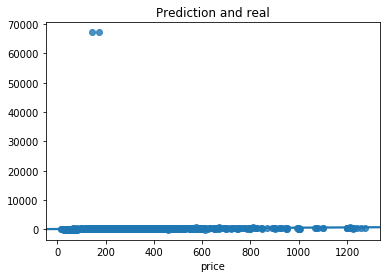

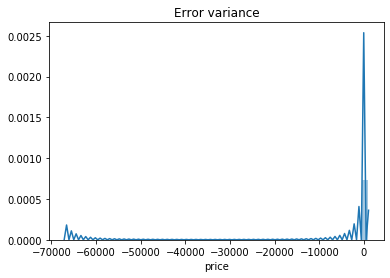

In [153]:
lm = LinearRegression(
        n_jobs = -1,
        normalize = True
)

lm.fit(X_train, y_train)

comment = ''

analysis(
    model = lm, 
    X_train = X_train, 
    X_test = X_test, 
    y_train = y_train, 
    y_test = y_test
)

Random Forest Regressor

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,55.03,9091.55,95.35,0.559,0.389,0.59,0.79


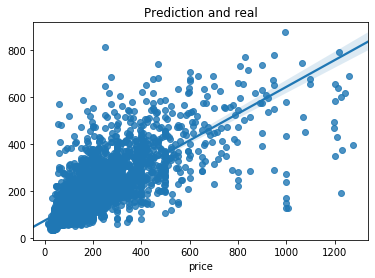

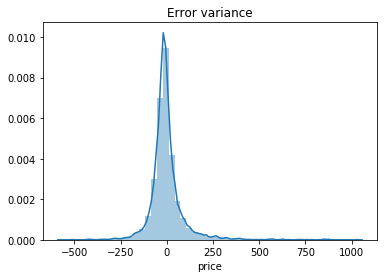

In [167]:
rfm = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          random_state = 101,
          n_estimators = 700
    
)
rfm.fit(X_train, y_train)

comment = ''

analysis(
    model = rfm, 
    X_train =X_train, 
    X_test = X_test, 
    y_train = y_train, 
    y_test = y_test
)

In [168]:
importancia_predictores = pd.DataFrame(
                            {'predictor': data_model_num_no_outliers.drop(columns = "price").columns,
                             'importancia': rfm.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
importancia_predictores = importancia_predictores.sort_values('importancia', ascending=False).head(10)
importancia_predictores

Importancia de los predictores en el modelo


,predictor,importancia
6,accommodates,0.232171
30,baths,0.147864
37,neighbourhood_group_cleansed_Manhattan,0.068566
9,minimum_nights,0.054191
7,bedrooms,0.043584
12,availability_30,0.043207
22,review_scores_location,0.039080
40,room_type_Entire home/apt,0.038820
42,room_type_Private room,0.037270
29,reviews_per_month,0.024503


In [169]:
# visualizacion de la importancia mediante un grafico de barras
data = [
    go.Bar(
        y = importancia_predictores["predictor"],
        x = importancia_predictores["importancia"],
        marker_color = "steelblue",
        orientation='h',
        name = "Importancia de variables"
    )      
]

layout = go.Layout(title = "Importancia de variables en el Random Forest", xaxis_title = "Importancia", yaxis_title = "Variables")

fig = go.Figure(data = data, layout = layout)

fig.show()

Gradient Boosting Regressor

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,55.22,9218.11,96.01,0.562,0.526,0.58,0.62


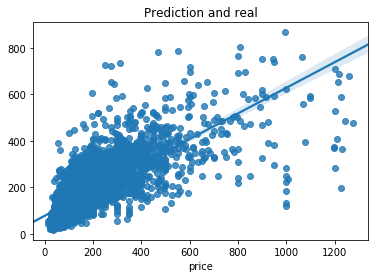

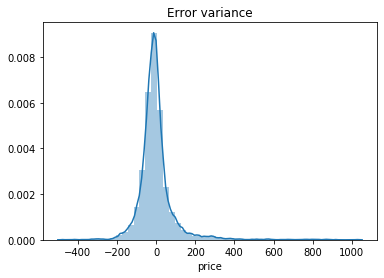

In [171]:
gbr_model = GradientBoostingRegressor(random_state = 101)
gbr_model.fit(X_train, y_train)

comment = ''

analysis(
    model = gbr_model, 
    X_train = X_train, 
    X_test = X_test,
    y_train = y_train, 
    y_test = y_test
)

In [172]:
importancia_predictores = pd.DataFrame(
                            {'predictor': data_model_num_no_outliers.drop(columns = "price").columns,
                             'importancia': gbr_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
importancia_predictores = importancia_predictores.sort_values('importancia', ascending=False).head(10)
importancia_predictores 

Importancia de los predictores en el modelo


,predictor,importancia
6,accommodates,0.249746
30,baths,0.152772
7,bedrooms,0.125045
37,neighbourhood_group_cleansed_Manhattan,0.109808
12,availability_30,0.055778
40,room_type_Entire home/apt,0.054455
22,review_scores_location,0.042946
42,room_type_Private room,0.041954
9,minimum_nights,0.034685
41,room_type_Hotel room,0.016358


In [173]:
# visualizacion de la importancia mediante un grafico de barras
data = [
    go.Bar(
        y = importancia_predictores["predictor"],
        x = importancia_predictores["importancia"],
        marker_color = "steelblue",
        orientation='h',
        name = "Importancia de variables"
    )      
]

layout = go.Layout(title = "Importancia de variables en el Random Forest", xaxis_title = "Importancia", yaxis_title = "Variables")

fig = go.Figure(data = data, layout = layout)

fig.show()

XG Boost

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,55.22,9218.11,96.01,0.562,0.526,0.58,0.62


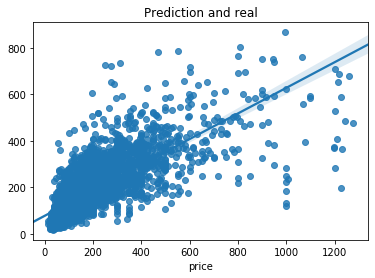

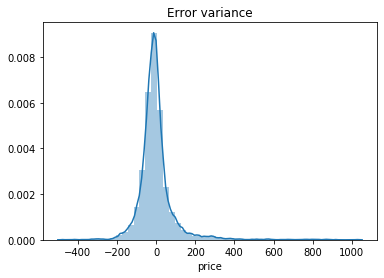

In [174]:
xg_model = xgb.XGBRegressor(random_state = 101)
xg_model.fit(X_train, y_train)

comment = ''

analysis(
    model = gbr_model, 
    X_train = X_train, 
    X_test = X_test,
    y_train = y_train, 
    y_test = y_test
)

In [175]:
importancia_predictores = pd.DataFrame(
                            {'predictor': data_model_num_no_outliers.drop(columns = "price").columns,
                             'importancia': xg_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
importancia_predictores = importancia_predictores.sort_values('importancia', ascending=False).head(10)
importancia_predictores

Importancia de los predictores en el modelo


,predictor,importancia
40,room_type_Entire home/apt,0.153392
42,room_type_Private room,0.144417
30,baths,0.089939
37,neighbourhood_group_cleansed_Manhattan,0.076662
41,room_type_Hotel room,0.073811
6,accommodates,0.071500
7,bedrooms,0.047679
12,availability_30,0.022597
9,minimum_nights,0.022087
34,host_response_time_within an hour,0.019170


In [176]:
# visualizacion de la importancia mediante un grafico de barras
data = [
    go.Bar(
        y = importancia_predictores["predictor"],
        x = importancia_predictores["importancia"],
        marker_color = "steelblue",
        orientation='h',
        name = "Importancia de variables"
    )      
]

layout = go.Layout(title = "Importancia de variables en el Random Forest", xaxis_title = "Importancia", yaxis_title = "Variables")

fig = go.Figure(data = data, layout = layout)

fig.show()